29/11/2023 Terri Hoare




In [1]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# special matplotlib argument for improved plots
from matplotlib import rcParams


In [3]:
boston = pd.read_csv('boston.csv')

In [4]:
type(boston)

pandas.core.frame.DataFrame

In [5]:
boston.shape

(506, 14)

In [6]:
# Print column names
boston.columns.values

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PT', 'B', 'LSTAT', 'MV'], dtype=object)

In [7]:
# Print description of Boston housing data set
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CRIM    506 non-null    float64
 1   ZN      506 non-null    float64
 2   INDUS   506 non-null    float64
 3   CHAS    506 non-null    int64  
 4   NOX     506 non-null    float64
 5   RM      506 non-null    float64
 6   AGE     506 non-null    float64
 7   DIS     506 non-null    float64
 8   RAD     506 non-null    int64  
 9   TAX     506 non-null    int64  
 10  PT      506 non-null    float64
 11  B       506 non-null    float64
 12  LSTAT   506 non-null    float64
 13  MV      506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


Now let's explore the data set itself.

In [8]:
boston.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98,24.000000
1,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14,21.600000
2,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03,34.700001
3,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94,33.400002
4,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33,36.200001


## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns.

In [9]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674030,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148862,2.105710,8.707259,168.537116,2.164946,91.294863,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377487,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440002,11.360000,21.200001
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.074999,5.188425,24.000000,666.000000,20.200001,396.225006,16.954999,25.000000
max,88.976196,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.899994,37.970001,50.000000


### Scatter plots
***

Let's look at some scatter plots for four variables: 'CRIM', 'RM', 'PT (PTRTIO); MV (MEDV) and 'NOX'.

What kind of relationship do you see? e.g. positive, negative?  linear? non-linear?

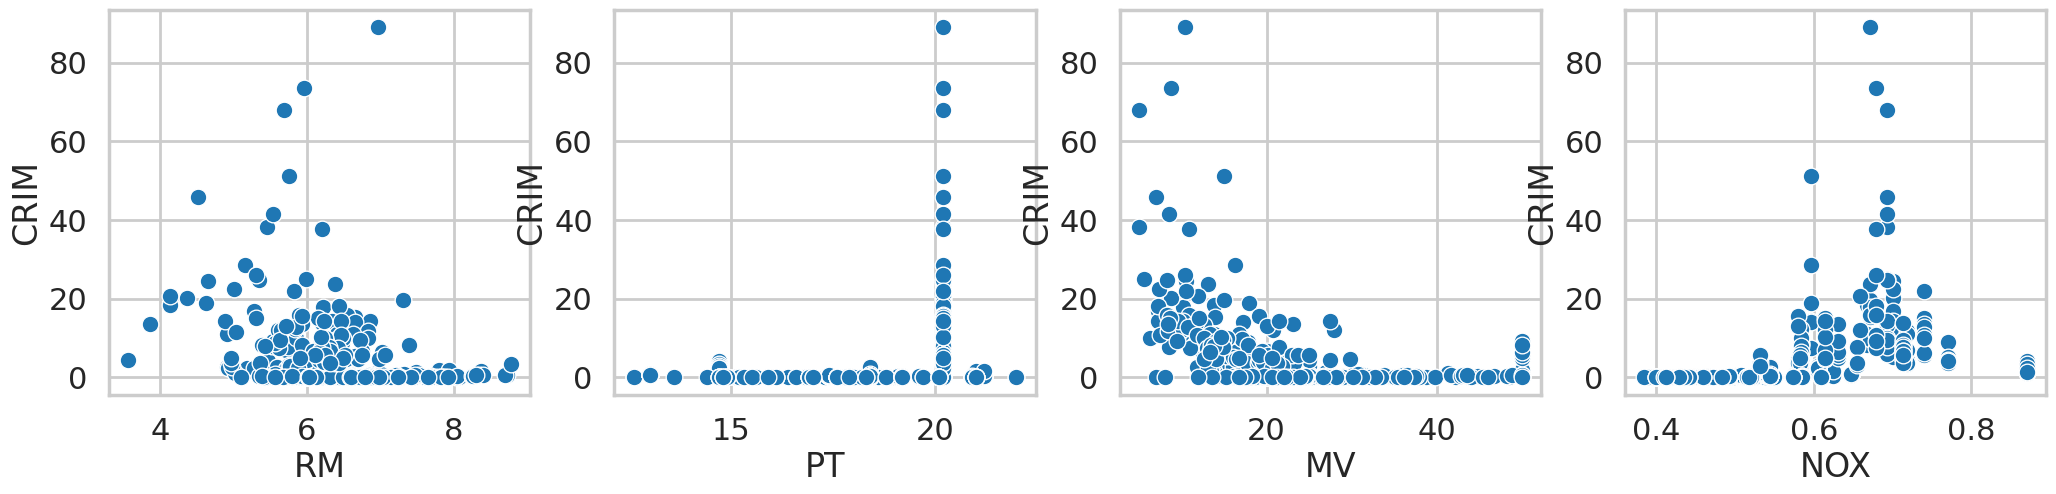

In [10]:
fig, ax = plt.subplots(1,4,figsize=(25,5))
for i, col in enumerate(["RM","PT","MV","NOX"]):
  sns.scatterplot(data=boston,
                x=col,
                y="CRIM",
                ax=ax[i])


### Histograms
***


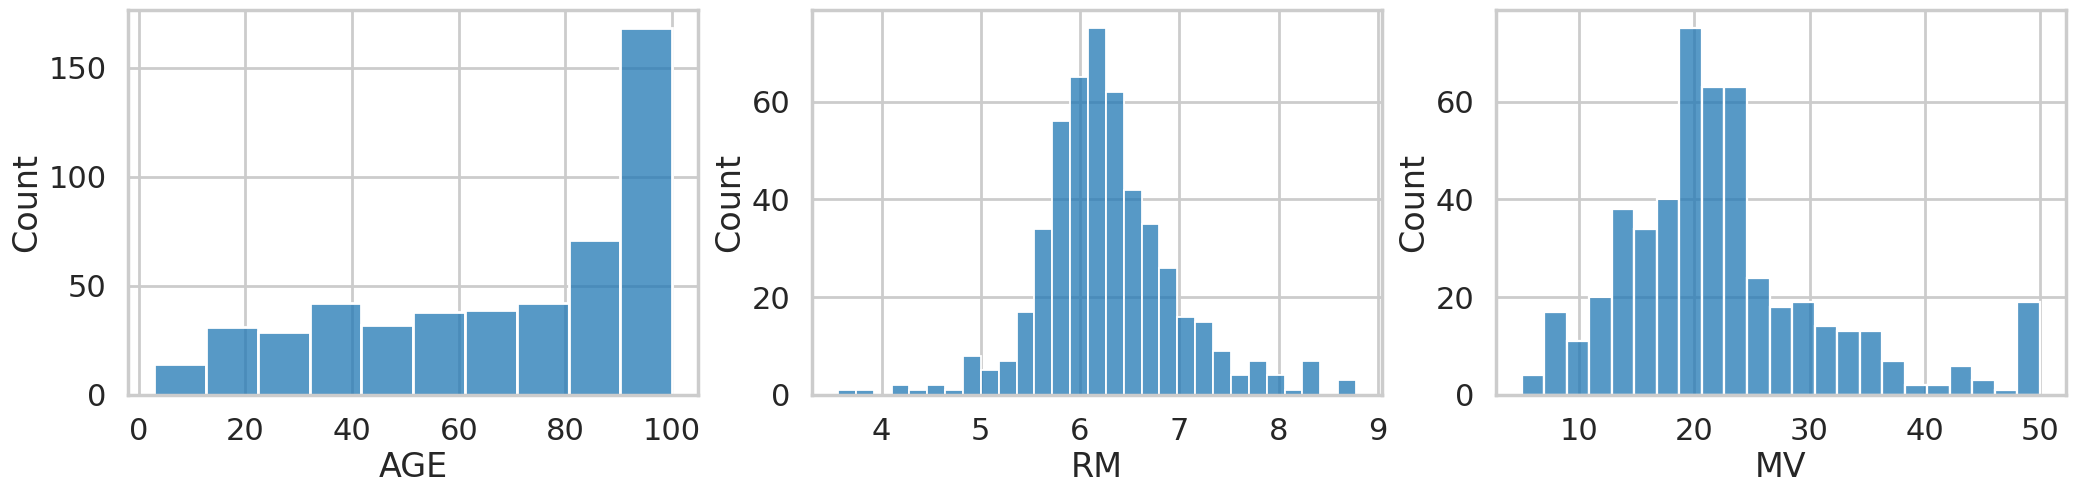

In [11]:
fig, ax = plt.subplots(1,3,figsize=(25,5))
for i, col in enumerate(["AGE","RM","MV"]):
  sns.histplot(data=boston,
                x=col,
                ax=ax[i])


## Multiple Linear regression with Boston data example
***

Here,

$Y$ = CRIM (also called "target" data in python)

and

$X$ = POLY(MEDV,2) (or independent variables)

which we will use to fit a linear regression model and predict CRIM. We will use the least squares method as the way to estimate the coefficients.  

We'll use two ways of fitting a linear regression using statsmodels or sklearn. We recommend the first but the second is also powerful in its features.

### Fitting Linear Regression using `statsmodels`
***

In [13]:
# Import regression modules
# ols - stands for Ordinary least squares, we'll use this
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [14]:
# Simple Regression
from statsmodels.base.model import Model
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
model = ols('CRIM~AGE',boston).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   CRIM   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     71.62
Date:                Thu, 30 May 2024   Prob (F-statistic):           2.85e-16
Time:                        10:32:17   Log-Likelihood:                -1772.7
No. Observations:                 506   AIC:                             3549.
Df Residuals:                     504   BIC:                             3558.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.7779      0.944     -4.002      0.000      -5.633      -1.923
AGE            0.1078      0.013      8.463      0.000       0.083       0.133
==============================================================================
Omnibus:                      574.509   Durbin-Watson:                   0.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            36741.899
Skew:                           5.322   Prob(JB):                         0.00
Kurtosis:                      43.366   Cond. No.                         195.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
# Multiple Regression
from statsmodels.base.model import Model
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
model = ols('CRIM~AGE+MV+LSTAT',boston).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   CRIM   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.221
Method:                 Least Squares   F-statistic:                     48.68
Date:                Thu, 30 May 2024   Prob (F-statistic):           1.25e-27
Time:                        10:32:22   Log-Likelihood:                -1741.8
No. Observations:                 506   AIC:                             3492.
Df Residuals:                     502   BIC:                             3508.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5890      2.032     -0.290      0.772      -4.581       3.403
AGE            0.0419      0.015      2.765      0.006       0.012       0.072
MV            -0.1261      0.055     -2.299      0.022      -0.234      -0.018
LSTAT          0.3295      0.082      4.021      0.000       0.169       0.491
==============================================================================
Omnibus:                      591.487   Durbin-Watson:                   1.142
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            46103.971
Skew:                           5.508   Prob(JB):                         0.00
Kurtosis:                      48.447   Cond. No.                         469.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(506, 1)
(506,)


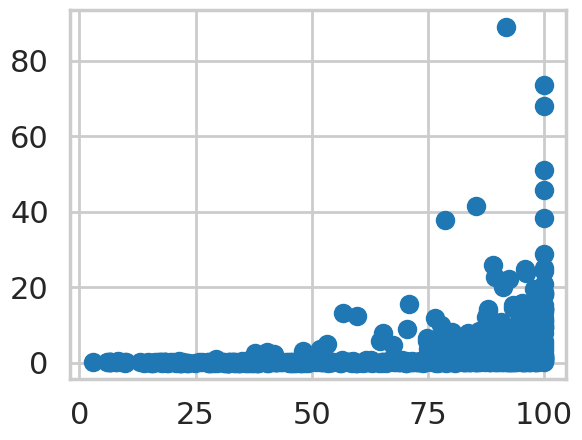

In [17]:
# Polynomial
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

x = boston["AGE"]
y = boston["CRIM"]

#Create single dimension
# x= x[:,np.newaxis]
# y= y[:,np.newaxis]
x=boston["AGE"].values
y=boston["CRIM"].values

inds = x.ravel().argsort()  # Sort x values and get index
x = x.ravel()[inds].reshape(-1,1)
y = y[inds] #Sort y according to x sorted index

print(x.shape)
print(y.shape)

#Plot
plt.scatter(x,y)




# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
# model = ols('CRIM~LSTAT+I(LSTAT^2)',boston).fit()
# model.summary()

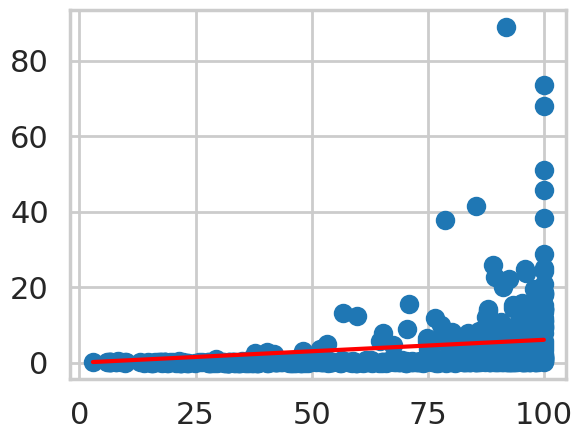

In [18]:
import statsmodels.api as sm

model = sm.OLS(y, x).fit()
ypred = model.predict(x)

plt.scatter(x,y)
plt.plot(x,ypred, color="red")

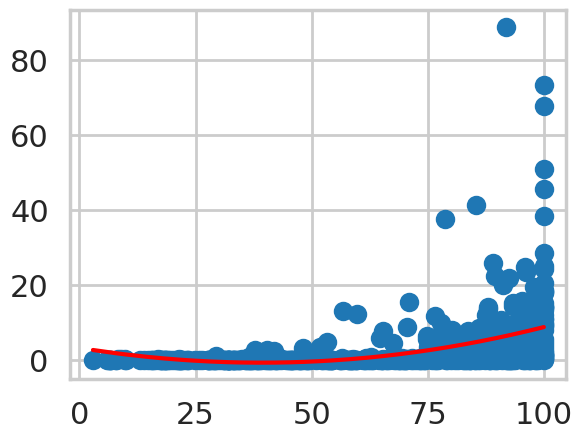

In [19]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=2)
xp = polynomial_features.fit_transform(x)
# xp.shape
import statsmodels.api as sm
model = sm.OLS(y, xp).fit()
ypred = model.predict(xp)
# ypred.shape
plt.scatter(x,y)
plt.plot(x,ypred, color="red")

In [20]:
# residual standard error
np.sqrt(model.mse_resid)

7.889564536436284

In [21]:
model.fittedvalues

array([ 2.74787316e+00,  2.19473634e+00,  2.16074499e+00,  2.11014308e+00,
        2.09337853e+00,  2.09337853e+00,  2.06000341e+00,  1.89620965e+00,
        1.89620965e+00,  1.80039875e+00,  1.72196864e+00,  1.58403001e+00,
        1.56896039e+00,  1.55394198e+00,  1.12727377e+00,  1.00828696e+00,
        9.06013285e-01,  8.31465105e-01,  7.82793587e-01,  7.70754049e-01,
        7.11327095e-01,  6.30286214e-01,  6.07593853e-01,  5.73940722e-01,
        5.73940722e-01,  5.51761958e-01,  5.40749825e-01,  4.75754529e-01,
        4.75754529e-01,  4.65101705e-01,  4.65101705e-01,  4.33451591e-01,
        4.02263515e-01,  3.61398645e-01,  3.01642032e-01,  2.34262996e-01,
        2.06156506e-01,  1.78512429e-01,  1.78512429e-01,  1.78512429e-01,
        1.69400398e-01,  1.42372634e-01,  1.33466042e-01,  1.33466042e-01,
        9.83534371e-02,  4.72252349e-02,  1.41670111e-02,  6.03081536e-03,
       -1.02482708e-01, -1.73829241e-01, -2.07576523e-01, -2.89310456e-01,
       -2.95238181e-01, -

In [22]:
residuals = boston.CRIM - model.fittedvalues
residuals.describe()

count    5.060000e+02
mean    -2.518635e-13
std      7.742894e+00
min     -8.815898e+00
25%     -3.156763e+00
50%     -5.513199e-01
75%      7.861979e-01
max      8.186826e+01
Name: CRIM, dtype: float64

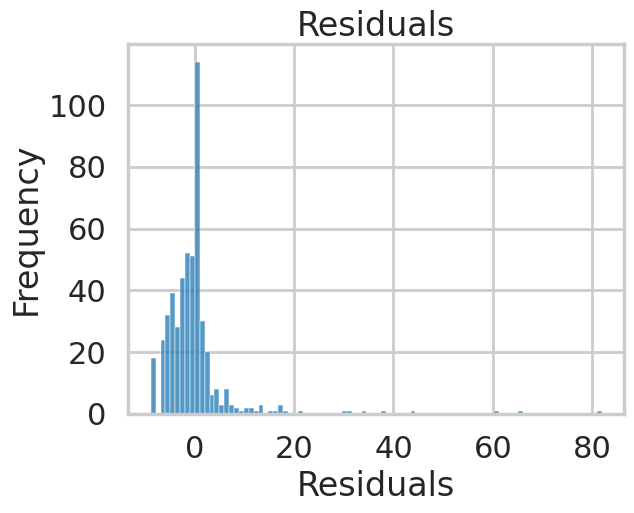

In [23]:
sns.histplot(residuals)
plt.title('Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

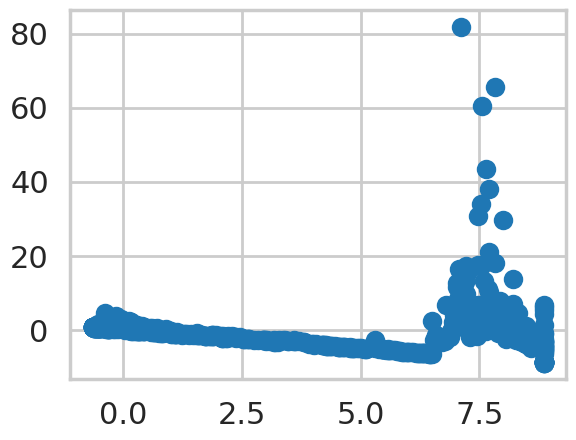

In [24]:
plt.scatter(model.fittedvalues, residuals)

In [25]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     48.63
Date:                Thu, 30 May 2024   Prob (F-statistic):           4.92e-20
Time:                        10:37:39   Log-Likelihood:                -1761.6
No. Observations:                 506   AIC:                             3529.
Df Residuals:                     503   BIC:                             3542.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3100      1.755      1.886      0.060      -0.138       6.758
x1            -0.2013      0.066     -3.039      0.002      -0.331      -0.071
x2             0.0026      0.001      4.751      0.000       0.002       0.004
==============================================================================
Omnibus:                      576.381   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            38624.962
Skew:                           5.329   Prob(JB):                         0.00
Kurtosis:                      44.454   Cond. No.                     3.25e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.25e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

####  `statsmodels` formulas
***
This formula notation will seem familiar to `R` users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (`Outcome`, `X1`,`X2`, ...), bbut you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is doone like this:

`Outcome ~ X1 + X2 + X3`

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex, for a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).
